# Livrable 2: 

<br>

**Groupe 4 : Anthony EBERHARD, Osman CEKIC, Johann CORNELIUS, Arthur LAMBERT, Oscar PALISSOT**

<br>

## Rappel du contexte :
L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.

Vous faites partie de l’équipe mise en place par CesiCDP pour répondre à l’appel de l’ADEME. L’enjeu est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer votre activité.

CesiCDP a décidé d’orienter son étude sur la gestion de tournées de livraison. Le problème algorithmique consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

L’idée est de proposer une méthode issue de la Recherche Opérationnelle pour générer une tournée de livraison correspondant à ce problème.

Le périmètre reste encore à préciser. Vous avez décrit une version de base du problème. Mais, afin de le rendre plus réaliste et retenir toute l’attention de l’ADEME, vous hésitez à ajouter des contraintes supplémentaires. Il faut s’attendre à ce qu’il soit ainsi plus dur à traiter.

<br>

## Définition du problème :

Nous avons à notre disposition une flotte de camions de livraison qui ont pour mission de livrer tous les colis. Les colis sont stockés dans notre entrepot qui sert de point de départ à nos camions. Les camions doivent livrer tous les colis en passant par tous les points de livraisons avant de rentrer à l'entrepot. Nous devons prendre en compte l'évolution du traffic sur les différents itinéraires.

<br>


## Modélisation du problème : 

Pour modéliser notre probleme nous avons fait le choix d'utiliser un graphe orienté. Les sommets du graphe représentent les points de livraisons et les arêtes, les itinéraires possibles entre chaque point de livraison. Les poids des arêtes représentent le temps de parcours entre chaque point de livraison. Le graphe sera évidemment connexe.

<br>

Exemple de graphe pondéré :

<br>

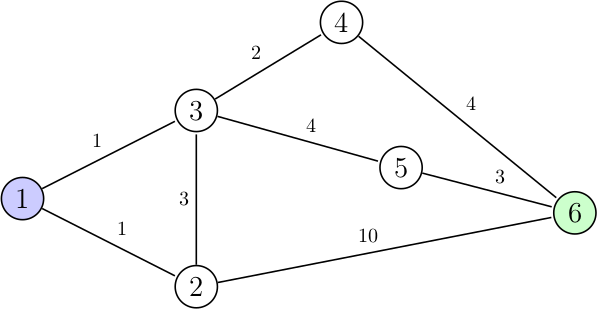

<br>

Afin de stocker et manipuler le graphe dans notre algorithme, nous allons faire appel à une matrice d'adjacence. La matrice d'adjacence permet de représenter les sommets voisins du graphe ainsi que leur pondération.

<br>

Exemple d'une matrice d'adjacence d'un graphe pondéré :

<br>

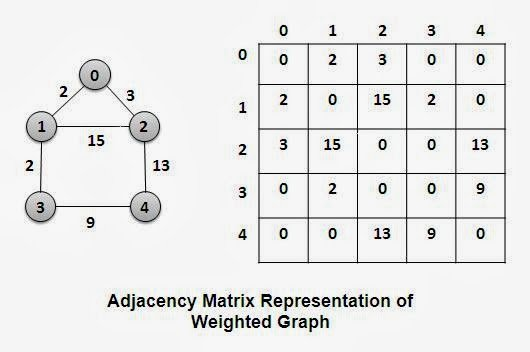

<br>

## Complexité du problème :

Notre problème s'apparente au problème de la chaine hamiltonienne avec quelques contraintes supplémentaires. Un chaine hamiltonienne est une chaine qui passe une et une seule fois par chacun des sommets d’un graphe non orienté. 
Le problème de la chaine hamiltonienne fait partie de l'ensemble $np$ . C'est-à-dire qu'il n'existe pas de solution polynomiale connu pour le résoudre.

<br>

Nous pouvons même approfondir en affirmant que le problème de la chaine hamiltonienne appartient à l'ensemble $np-complet$. **_cf corbeille d'exercice du prosit 2_**.

<br>

C'est-à-dire :

<ul>
    <li>il est possible de vérifier une solution en temps polynomial; la vérification appartient à l'ensemble $p$</li>
    <li>tous les problèmes de la classe $np$ se ramènent à celui-ci via une réduction polynomiale ; cela signifie que le problème est au moins aussi difficile que tous les autres problèmes de la classe $np$.</li>
</ul>

Or, comme dit précedemment, notre problème de livraison s'apparente à un problème de chaine hamiltonienne tout en y ajoutant des contraintes suplémentaires.

Pour la compléxité de notre problème nous avons donc :
$$O()_{chaineHamiltonienne} < O()_{livraison} $$

Nous pouvons donc affirmer que notre problème appartient à l'ensemble $np-complet$ et qu'il n'existe aucune solution en temps polynomial.

## Définitions des variables :


- $n$ le nombre de villes
- $N$ est l'ensemble des villes, avec $N=\{1,2,...,n\}$
- $p$ le nombre de véhicules
- $v$ est un véhicule particulier
- $V$ est l'ensemble des véhicules, avec $N=\{1,2,...,p\}$
- $R$ est l'ensemble des routes, avec $R\{(i,j)\in N^2 : i\neq j\}$
- $c_{ij}$ est le coût du trajet qui emprunte la route $(i,j)\in R$
- $Q$ est la capacité du véhicule
- $q$ est le volume de colis à livrer à la ville $i\in N$


<br>

La variable binaire prend la valeur $1$ si l'arète qui relie le sommet $i$ et $j$ si l'arète fait fait partie de l'itinéraire optimal et est empruntée par le véhicule $k$.

$$x_{ijk} \in \left\{ 0,1 \right\} \; \forall k \in \left\{ 1,...,p \right\},\: i,j \in \left\{ 1,...,n \right\}$$
<br>

Nous notons qu'un véhicule ne peut pas réaliser un trajet d'un sommet au même sommet.
<br>

$$x_{ijk} \in 0 \; \forall k \in \left\{ 1,...,p \right\},\: i,j \in \left\{ 1,...,n \right\}$$

<br>

## Fonction objectif : 

<br>

La fonction objectif minimise le coût des trajets de la tournée. Le coût n'est pas exprimé ici dans une unité particulière. Il est calculé à partir des poids du graphe pondéré représentant nos villes. Le coût peut être interprété comme la distance en km, le temps de trajet en minute, le coût de carburant en euro... Dans tous les cas, plus il est bas, plus la tournée est optimale.
$$Min \sum_{v=1}^{p} \sum_{i=0}^{n} \sum_{j=0,\; i\neq j}^{n} c_{ij}x_{ijv}$$

<br>

## Contraintes : 

Plusieurs contraintes se dégagent de ce problème.

<br>
<ul>
    <li>Les camions ont un point de départ : l'entrepot.</li>
    <br>
    $$ \sum_{j=2}^{n} x_{ijv} = 1 \;\;\; \forall v \in \{1,...,p\}$$
    <br>
    <li>Une ville ne peut pas être visité par 2 véhicules dans la même tournée.</li>
    <br>
    $$ \sum_{v=1}^{p} \sum_{i=1}^{n} x_{ijk} = 1 \;\;\; \forall j \in \{2,...,n\}$$
    <br>
    <li>Les véhicules quitte la ville dans laquelle il est arrivé. Après leur tournée, les camions doivent revenir à l'entrepot.</li>
    <br>
    $$ \sum_{i=1}^{n} x_{ijv} = \sum_{i=1}^{n} x_{jiv} \;\;\; \forall j \in \{1,...,n\}, \; v \in \{1,...,p\}$$
</ul>
<br>
<br>
Nous devons aussi sélectionner une contrainte à ajouter à notre périmètre d'étude afin d'apporter une réponse sérieuse à l'appel d'offre de l'ADEME.
Contrainte choisie :
<br>
<br>
<ul>
    <li>Les véhicules ont une capacité maximale.</li>
    <br>
    $$ \sum_{i = 1}^{n}\sum_{j = 2}^{n} q_{j}x_{ijv}\;\;\; \forall v \in \{1,...,p\}$$
</ul>

<br>


- Notre solution doit être capable de résoudre le problème pour plusieurs milliers de points de livraison.
- Nous devons prendre en compte les évolutions du traffic en fonction des horaires
- Certains points de livraison n'ont pas d'itinéraire direct entres eux. Il faut donc passer par un point de livraison intermédiaire pour aller de l'un à l'autre.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Génération des élements : 
<br>
Avant de véritablement commencer la résolution du problème, il convient de générer les éléments de notre étude. Dans notre cas, des villes et des routes respectivement représentées par des points dans un repère et des segments reliants les villes connectées entre elles par une route.


In [34]:
#le nombre de villes
n = 10

#le delta des poids des route
deltaPoids = 10 

#a probabilité que deux villes ne soient pas reliées entre elles
probaNoRoute = 0.75

#le nombre de colis
c = 100

# utiliser un seed explicitement permettra de reproduire les conditions initiales
# et de comparer le comportement de différents algorithmes sur une même instance
random.seed(a=3)

## Génération des villes :    

  Nous commençons par générer les villes. La fonction **_generateVille_** renvoie un tuple contenant les coordonnées des villes générées. Elle prend comme paramètre le nombre de ville que l'on souhaite générer.

In [35]:
def generateVille(n):
    x = [random.uniform(0, 1000) for n in range(n)]
    y = [random.uniform(0, 1000) for n in range(n)]
    x[0] = 500
    y[0] = 500
    N = (x, y)
    return N

## Génération des routes :
Nous générons ensuite les routes. La fonction **_generateRoutes_** renvoie un tableau à deux dimensions représentant la matrice d'adjacences. Elle prend comme paramètre le nombre de ville, le delta des coûts de trajet que l'on souhaite appliquer aux routes et la probabilité que deux villes ne soient pas reliées entre elles.


In [36]:
def generateRoute(n, deltaPoids, probaNoRoute):
    matrice = []
    ponderationVille = [i for i in range(deltaPoids)]
    for _ in range(n):
        proba = [round((1-probaNoRoute)/(len(ponderationVille)-1), 5) for n in range(len(ponderationVille))]
        proba[0] = probaNoRoute
        matrice.append(random.choices(ponderationVille, weights=proba, k=n))
    return matrice

## Génération de la carte : 
<br>
Cette fonction est purement facultative. Elle sert à générer une carte représentant les éléments générés. Elle prend comme paramètre les villes et les routes générées.

In [45]:
villes = generateVille(n)

routes = generateRoute(n, deltaPoids, probaNoRoute)

villesCoor = {i: (villes[0][i], villes[1][i]) for i in range(len(villes[0]))}
#for r in routes:
    #villesVoisine = {j: i for j in range(len(villes[0])) if routes[i][j] !=0}
#for i in routes:
    #print(i)
#print(villesVoisine)

TypeError: list indices must be integers or slices, not list

In [20]:
def generateMap(villes, routes):
    for x in range(len(villes[0])):
        for y in range(len(villes[0])):
            if (routes[x][y] != 0):
                x_values = [villes[0][x], villes[0][y]]
                y_values = [villes[1][x], villes[1][y]]
                plt.plot(x_values, y_values, c='lightblue')
    plt.scatter(villes[0], villes[1],s=400)
    plt.gcf().set_size_inches(18, 10)
    plt.show()

In [21]:
def generateMapTest(villes, routes):
    x_values = []
    y_values = []
    for p in range(len(villes[0])):
        coor = {n: villesCoor[n] for n in range(len(routes[p])) if routes[p][n] !=0}
    for x in range(len(villes[0])):
        for y in range(len(villes[0])):
            if (routes[x][y] != 0): 
                plt.plot((villesCoor[x][0], villesCoor[y][0]), (villesCoor[x][1], villesCoor[y][1]), c='lightblue')
                
    plt.scatter(villes[0], villes[1],s=400)
    plt.gcf().set_size_inches(18, 10)
    plt.show()
    
    


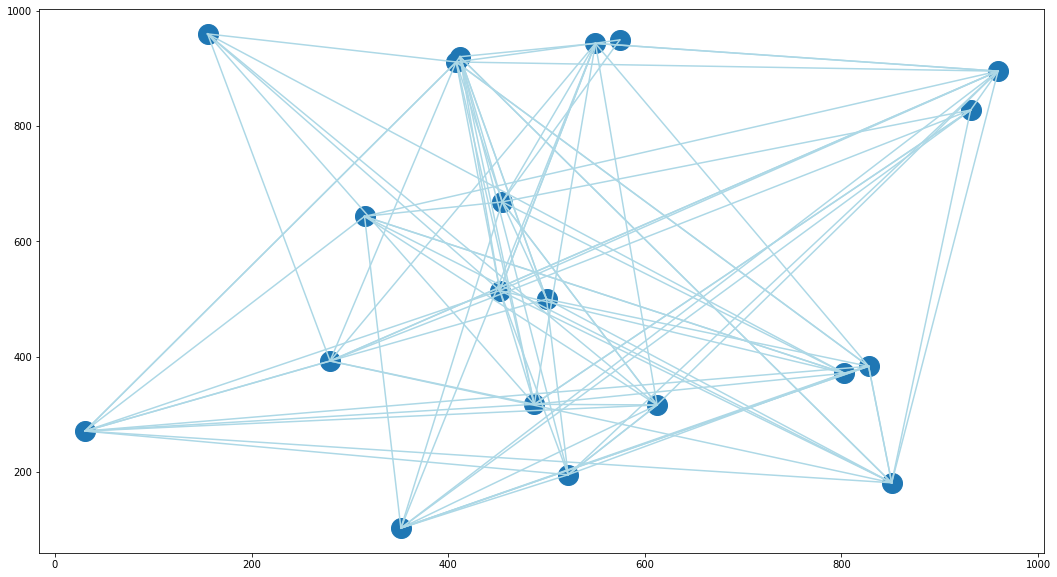

In [22]:
generateMapTest(villes, routes)

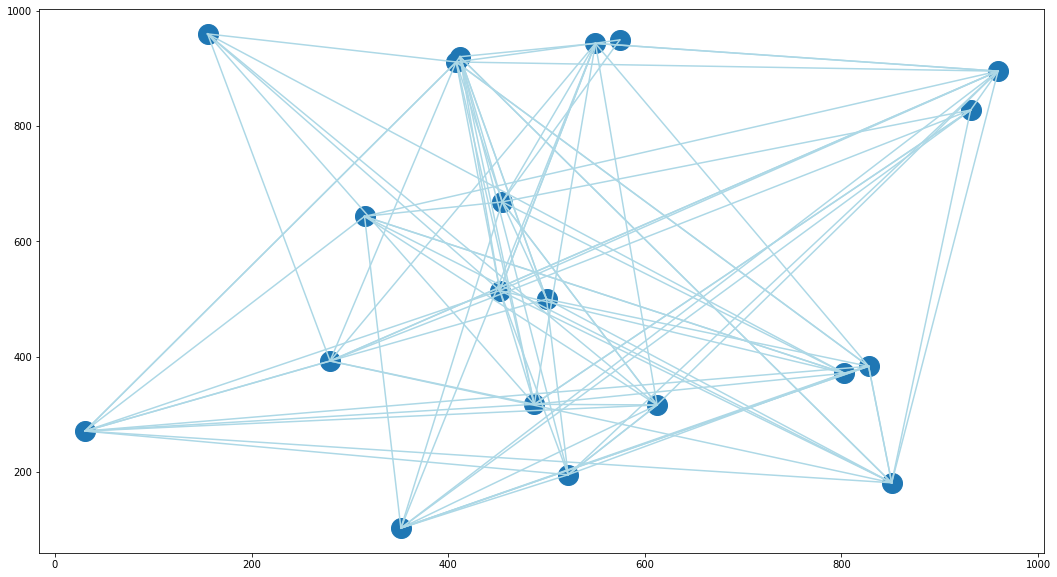

In [23]:
generateMap(villes, routes)

## Première approche :  hill-climbing
<br>
Cet algorithme heuristique permet une première approximation du resultat.

### Solution aléatoire :
Je commence par générer une solution aléatoire au problème. Ce n'est pas la plus optimale mais c'est un point de départ.